In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# importing dataset into a pandas dataframe
df = pd.read_csv('can-stats-2012-22.csv')
df
                

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


Observe the data

In [5]:
df.sample(10)


,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
929,2017,Croatia,204,219,423
431,2014,Rep. of Korea,239,5,244
1386,2020,Azerbaijan,622,117,739
574,2015,Georgia,449,98,547
483,2014,Solomon Islands,39,0,39
115,2012,Niger,69,12,81
1558,2021,Chile,104,401,505
815,2016,South Africa,53,34,87
1724,2022,Bulgaria,68,25,93
463,2014,Norway,5,0,5


In [6]:
df.shape

(1870, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [8]:
df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df['Country-of-origin'].nunique()

184

In [12]:
# Result of observation
The data contains 1870 rows and 5 columns
There are no duplicates in the data
The data columns are in their appropriate datatype so no need to change
There are no missing values

Summary Statistics


In [50]:
# describe to generate summary statistics 
df.describe()

,Year,UNHCR-refugees,Asylum-seekers,total-count
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,2016.955615,752.438503,323.139572,1075.578075
std,3.167123,2427.738942,1181.143362,2980.751399
min,2012.000000,0.000000,0.000000,0.000000
25%,2014.000000,20.000000,7.000000,39.250000
50%,2017.000000,124.000000,36.000000,187.000000
75%,2020.000000,563.750000,195.250000,889.750000
max,2022.000000,75098.000000,19765.000000,75294.000000


* With the summary above:
The data was collected over the course of 10 years(2012 - 2022)
In the course of this period we have an average of 752 refugees
In the course of this period we have an average of 323 assylum seekers



Analysis Questions :
1. From which countries has canada admitted the highest number of refugees

In [20]:
refugees_by_country = df['UNHCR-refugees'].groupby(by = df['Country-of-origin']).sum().sort_values(ascending = False)[0:5]
refugees_by_country

Country-of-origin
Colombia    108416
China        98586
Ukraine      88376
Pakistan     74737
Haiti        70956
Name: UNHCR-refugees, dtype: int64

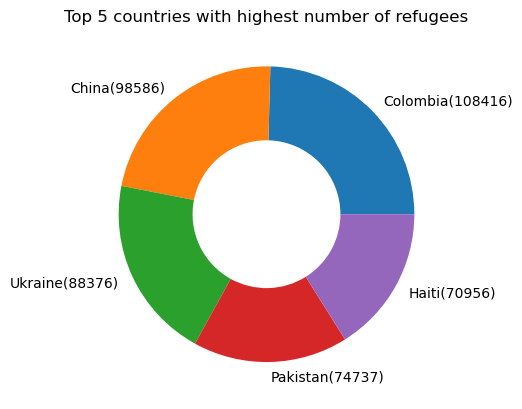

In [56]:
key = ['Colombia(108416)','China(98586)','Ukraine(88376)','Pakistan(74737)','Haiti(70956)']
plt.pie(refugees_by_country,labels = key, radius = 1.0, wedgeprops = dict(width = 0.5))
plt.title('Top 5 countries with highest number of refugees')
plt.show()

2. What are the total number of resettled refugees in canada per year?

In [24]:
refugees_per_year = df['UNHCR-refugees'].groupby(by = df['Year']).sum().reset_index()
refugees_per_year

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


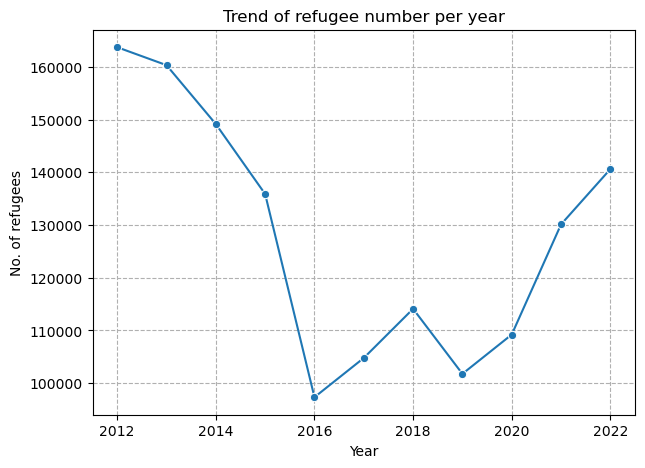

In [27]:
# Visualization of number of refugees per year using line plot
plt.figure(figsize = (7,5))
sns.lineplot(data = refugees_per_year, x = 'Year' , y = 'UNHCR-refugees',marker ='o')
plt.title('Trend of refugee number per year')
plt.xlabel('Year')
plt.ylabel('No. of refugees')
plt.grid(visible = True, linestyle = '--')

3. What are the countries of origin for the majority of asylum claims made in canada?


In [33]:
assylum_by_country = df['Asylum-seekers'].groupby(by = df['Country-of-origin']).sum().sort_values(ascending = False).reset_index()[0:5]
assylum_by_country

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908


In [34]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center' )

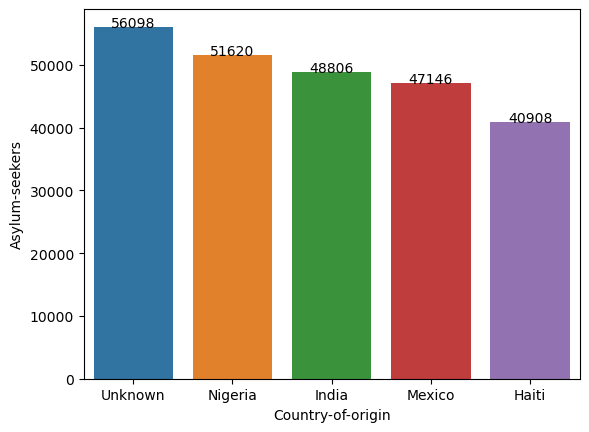

In [57]:
sns.barplot(data = assylum_by_country, x = 'Country-of-origin', y = 'Asylum-seekers')
add_labels(assylum_by_country['Country-of-origin'],assylum_by_country['Asylum-seekers'])


4. What is the total number of asylum claims made in canada every year?

In [38]:
asylum_per_year = df['Asylum-seekers'].groupby(by = df['Year']).sum().reset_index()
asylum_per_year

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


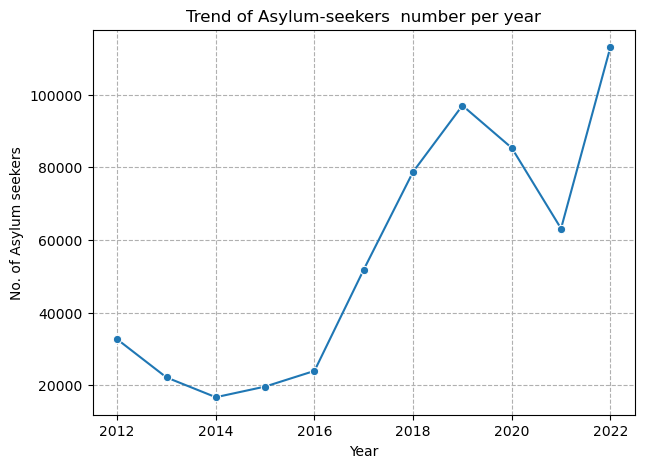

In [40]:
# Visualization of number of refugees per year using line plot
plt.figure(figsize = (7,5))
sns.lineplot(data = asylum_per_year, x = 'Year' , y = 'Asylum-seekers',marker ='o')
plt.title('Trend of Asylum-seekers  number per year')
plt.xlabel('Year')
plt.ylabel('No. of Asylum seekers')
plt.grid(visible = True, linestyle = '--')

5. What are the general trendin refugee and asylum statistics from 2012 - 2022?

In [42]:
ref_asy_year = df.groupby(by = "Year")[['UNHCR-refugees','Asylum-seekers']].sum().reset_index()
ref_asy_year

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [43]:
melted_data = pd.melt(frame = ref_asy_year,id_vars = 'Year',var_name = 'Category', value_name ='Value')
melted_data

,Year,Category,Value
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


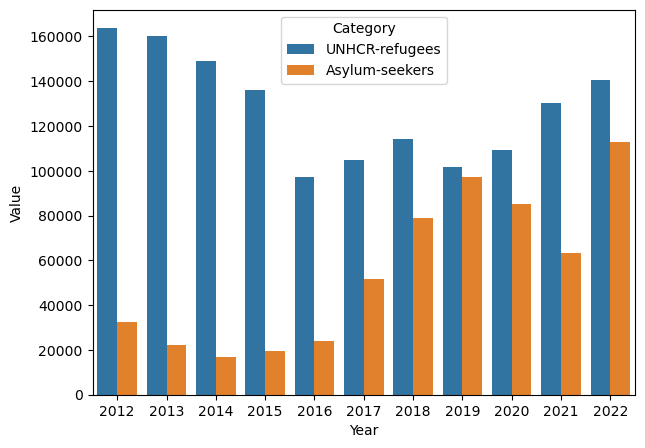

In [46]:
plt.figure(figsize =(7,5))
sns.barplot(data = melted_data, x = 'Year', y = 'Value', hue = 'Category')
plt.show()